Python Challenge Module 4 IGTI Bootcamp

In this challenge, all modules presented during module 4 of this Bootcamp are used.

In [1]:
#import the libraries
import pandas as pd  # libraty to work with dataframes
import numpy as np # library for treatment with numerical data
from matplotlib import pyplot as plt # plot graphs
import seaborn as sns # plot graphs in a more "elegant" format

In [2]:
from google.colab import files
uploaded = files.upload()

Saving doencas_coracao.csv to doencas_coracao.csv


In [3]:
dfcor = pd.read_csv('doencas_coracao.csv')

Exploratory Analysis Data

In [4]:
entradas = dfcor.iloc[:, :-1].values
saida = dfcor.iloc[:, -1].values

In [5]:
#question 1
dfcor.shape

(299, 13)

In [6]:
dfcor.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [7]:
#question 2 #Showing the Number of Instances and Attributes
dfcor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#normalization
from sklearn.preprocessing import MinMaxScaler
normaliza = MinMaxScaler() # object that normalizes data
entradas_normalizadas = normaliza.fit_transform(entradas)

In [9]:
#split oh the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=42)


In [10]:
#adding verification for my own learning
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(entradas_normalizadas.shape)

(209, 12)
(90, 12)
(209,)
(90,)
(299, 12)


In [11]:
##using the sample's function to see ramdomly lines with the characteristics of the dataset
dfcor.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
43,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33,0
271,51.0,0,582,1,40,0,221000.0,0.9,134,0,0,244,0
213,48.0,1,131,1,30,1,244000.0,1.6,130,0,0,193,1
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,175,0
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
194,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
127,58.0,1,200,1,60,0,300000.0,0.8,137,0,0,104,0
94,58.0,0,144,1,38,1,327000.0,0.7,142,0,0,83,0
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187,0


In [12]:
#question 3 What was the average age of patients who died?
question_3 = dfcor[dfcor['DEATH_EVENT'] == 1]
question_3.mean()


age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
DEATH_EVENT                      1.000000
dtype: float64

In [13]:
#questoin 3 (alternative)
dfcor[dfcor['DEATH_EVENT'] == 1].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [14]:
#question 4 (how many female patients died?)
dfcor.query('DEATH_EVENT == 1')['sex'].value_counts().sort_index()

0    34
1    62
Name: sex, dtype: int64

In [15]:
#total of female patients
dfcor[dfcor['sex'] == 0].count()

age                         105
anaemia                     105
creatinine_phosphokinase    105
diabetes                    105
ejection_fraction           105
high_blood_pressure         105
platelets                   105
serum_creatinine            105
serum_sodium                105
sex                         105
smoking                     105
time                        105
DEATH_EVENT                 105
dtype: int64


Using algorithms for Model evaluation

In [16]:
#importing the libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model

#importing the libraries to plot the Confusion Matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [17]:
#Loading and Training KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [18]:
#question 5 KNN Accuracy
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN: {0:.2f}%".format(acc_knn*100))

Accuracy of KNN: 61.11%


In [19]:
#building the Confusion Matrix of KNN
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_knn)
print(confusion_matrix)

[[51  2]
 [33  4]]


In [20]:
#KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.96      0.74        53
           1       0.67      0.11      0.19        37

    accuracy                           0.61        90
   macro avg       0.64      0.54      0.47        90
weighted avg       0.63      0.61      0.51        90



**Plotting the Confusion Matrix using KNN(KNeighborsClassifier)**

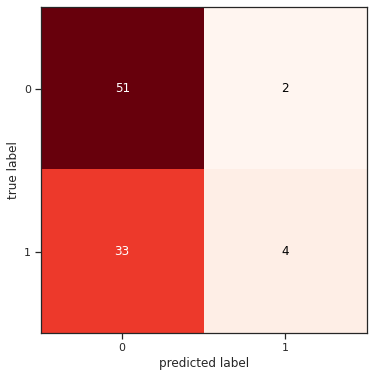

In [21]:
#plotting KNN Confusion Matrix
sns.set_theme(style = ('white'))
plt.rcParams['figure.figsize'] = (6,6)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, cmap="Reds")
plt.show()

In [22]:
#Loading and Training Decision Tree
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

In [23]:
# Decision Tree Accuracy
from sklearn.metrics import accuracy_score
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy of the Decision Tree: {0:.2f}%".format(acc_tree*100))

Accuracy of the Decision Tree: 66.67%


In [24]:
#building the Confusion Matrix of the Decision Tree
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[42 11]
 [19 18]]


In [26]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



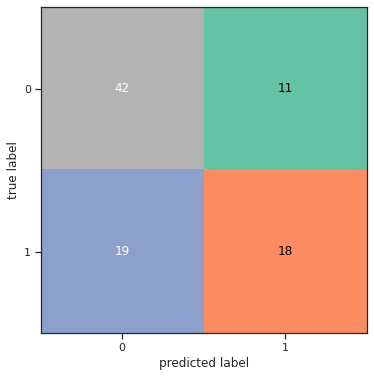

In [27]:
#plotting the Confusion Matrix of the Decision Tree
sns.set_theme(style = 'white')
plt.rcParams['figure.figsize'] = (6, 6)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, cmap = 'Set2')
plt.show()


In [28]:
#Loading and Training MLP Neural Network
#setting the MLP
mlp = MLPClassifier(solver = 'lbfgs', alpha= 1e-5, hidden_layer_sizes = (5, 10), random_state = 1)

In [29]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
y_pred_mlp = mlp.predict(x_test)

In [31]:
# MLP Accuracy
from sklearn.metrics import accuracy_score
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLPClassifier: {0:.2f}%".format(acc_mlp*100))

Accuracy of MLPClassifier: 71.11%


In [32]:
#building the Confusion Matrix of MLP
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_mlp)
print(confusion_matrix)

[[51  2]
 [24 13]]


In [33]:
#MLP Classification Report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80        53
           1       0.87      0.35      0.50        37

    accuracy                           0.71        90
   macro avg       0.77      0.66      0.65        90
weighted avg       0.76      0.71      0.67        90



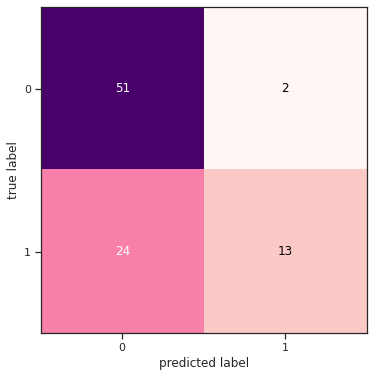

In [34]:
#plotting MLP Confusion Matrix
sns.set_theme(style = ('white'))
plt.rcParams['figure.figsize'] = (6, 6)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, cmap = 'RdPu')

Question 6 - Which of the algorithms was more accurate?

In [35]:
# KNN
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN          : {0:.2f}%'.format(acc_knn*100))

#Decision Tree
accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy of Decision Tree: {0:.2f}%'.format(acc_tree*100))

#Rede MLP
accuracy = accuracy_score(y_test, y_pred_mlp)
print('Accuracy of MLPClassifier: {0:.2f}%'.format(acc_mlp*100))

Accuracy of KNN          : 61.11%
Accuracy of Decision Tree: 66.67%
Accuracy of MLPClassifier: 71.11%


**Doing extra analyze in the dataset of who is alive**

After found the best algorithm to evaluate the Model, let’s do an analysis with more details of the information contaneid in the dataset.

For that let’s start considering only who is alive in accordance with dataset and immediatly checking if there are age’s outliers and their connection with the sodium, as we know the sodium is one of the three largest electrolytes present in the human body.

Will be created one "new" dataset called dfcor_alive for this purpose, and, although correlation does not mean casuality, we will plot a pearson’s correlation matrix.


In [36]:
#creating a "new" dataset only of who is alive (called dfcor_alive)
dfcor_alive = dfcor[dfcor['DEATH_EVENT'] == 0]
dfcor_alive.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.0
mean,58.761906,0.408867,540.054187,0.418719,40.266010,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901,0.0
std,10.637890,0.492840,753.799572,0.494569,10.859963,0.469579,97531.202283,0.654083,3.982923,0.478071,0.469579,67.742872,0.0
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,12.000000,0.0
25%,50.000000,0.000000,109.000000,0.000000,35.000000,0.000000,219500.000000,0.900000,135.500000,0.000000,0.000000,95.000000,0.0
50%,60.000000,0.000000,245.000000,0.000000,38.000000,0.000000,263000.000000,1.000000,137.000000,1.000000,0.000000,172.000000,0.0
75%,65.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.200000,140.000000,1.000000,1.000000,213.000000,0.0
max,90.000000,1.000000,5209.000000,1.000000,80.000000,1.000000,850000.000000,6.100000,148.000000,1.000000,1.000000,285.000000,0.0


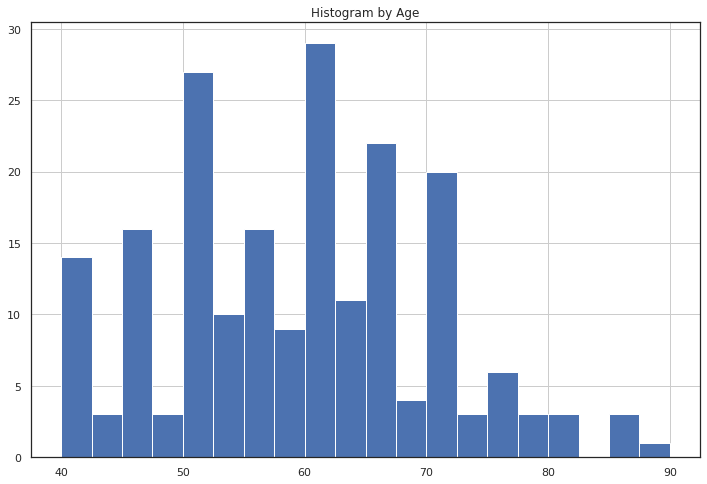

In [37]:
#plotting histogram by age (of who is alive)
fig, ax = plt.subplots()
dfcor_alive['age'].hist(bins = 20, figsize = (12,8))
ax.set_title("Histogram by Age");

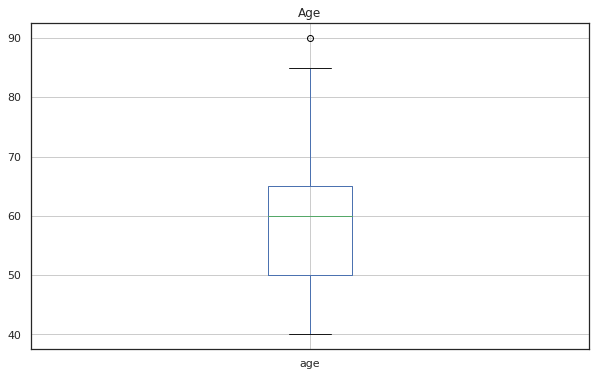

In [38]:
#looking for outliers in the age
fig, ax = plt.subplots()
dfcor_alive['age'].plot.box(grid = True, figsize = (10,6))
ax.set_title("Age");

In [39]:
dfcor_alive.sample(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
244,54.0,0,582,1,38,0,264000.00,1.8,134,1,0,213,0
215,73.0,0,582,0,35,1,203000.00,1.3,134,1,0,195,0
258,45.0,1,66,1,25,0,233000.00,0.8,135,1,0,230,0
174,65.0,0,198,1,35,1,281000.00,0.9,137,1,1,146,0
290,45.0,0,615,1,55,0,222000.00,0.8,141,0,0,257,0
212,78.0,0,224,0,50,0,481000.00,1.4,138,1,1,192,0
85,51.0,0,78,0,50,0,406000.00,0.7,140,1,0,79,0
199,60.0,0,1211,1,35,0,263358.03,1.8,113,1,1,186,0


Considering that sodium is responsible for regulating blood pressure and volume, let's see a boxplot in connection with the age, because know this could reveal some direction to take in order to solve any problem.

Ideally, sodium values ​​should be between 135 and 145 mEq / L.

Text(0.5, 1.0, 'Graph Serum Sodium per Age')

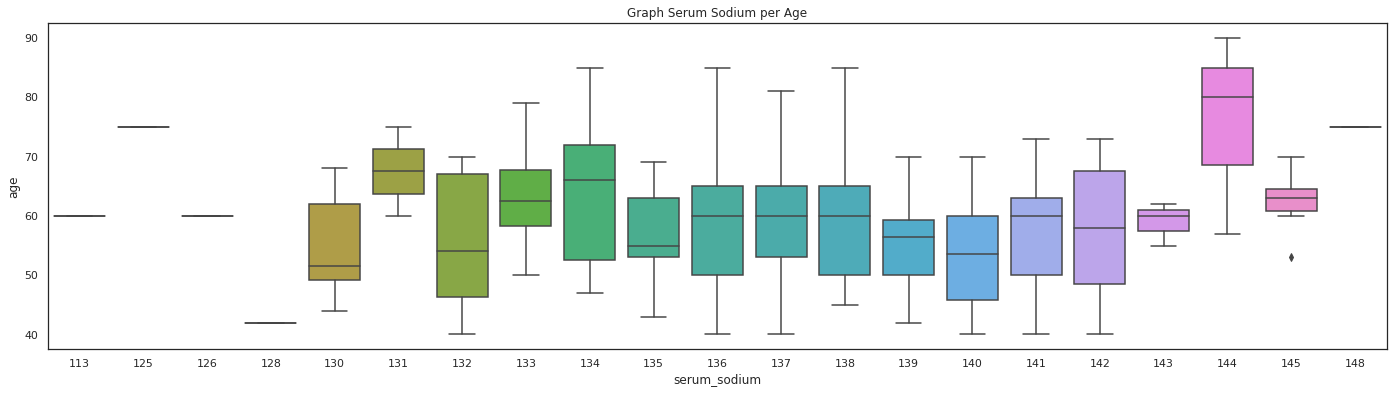

In [40]:
#checking the level of sodium
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))

sns.boxplot(x = 'serum_sodium', y = 'age', data = dfcor_alive)
plt.title("Graph Serum Sodium per Age")

In [41]:
dfcor_alive.query('age > 80').value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
90.0  1        337                       0         38                 0                    390000.0   0.90              144           0    0        256   0              1
85.0  1        910                       0         50                 0                    235000.0   1.30              134           1    0        121   0              1
               102                       0         60                 0                    507000.0   3.20              138           0    0        94    0              1
      0        212                       0         38                 0                    186000.0   0.90              136           1    0        187   0              1
81.0  0        4540                      0         35                 0                    231000.0   1.18              137           1    1        10

In [42]:
correlation = dfcor_alive.corr()

Text(0.5, 1.0, 'Matriz de Correlação de Pearson')

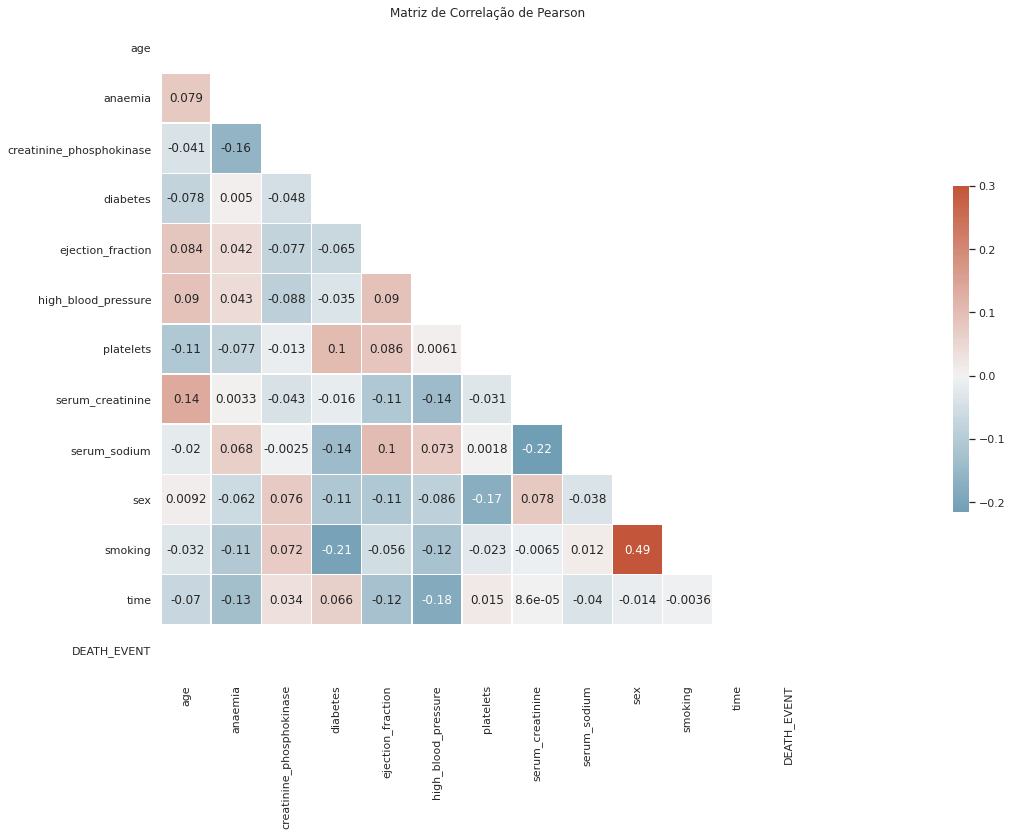

In [43]:
#plotting a diagonal pearson's correlation 
import numpy as np
plt.figure(figsize = (50, 12))
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de Correlação de Pearson")

Because the MLP Classifier was the best algorithm to evaluate the original dataset, let’s use it again now to evaluate the “new” dataset that excludes that people had already died. 

In [44]:
entradas_alive = dfcor_alive.iloc[:, :-1].values
saida_alive = dfcor_alive.iloc[:, -1].values

In [45]:
#normalization alive
from sklearn.preprocessing import MinMaxScaler
normaliza_alive = MinMaxScaler() # object that normalizes data_alive
entradas_normalizadas_alive = normaliza.fit_transform(entradas_alive)

In [46]:
#split oh the dataset alive
from sklearn.model_selection import train_test_split
x_train_alive, x_test_alive, y_train_alive, y_test_alive = train_test_split(entradas_normalizadas_alive, saida_alive, test_size=0.30, random_state=42)

In [47]:
#importing MLPClassifier alive
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model

#importing the libraries to plot the Confusion Matrix Alive
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [48]:
#Loading and Training MLP Neural Network Alive
#setting the MLP alive
mlp_alive = MLPClassifier(solver = 'lbfgs', alpha= 1e-5, hidden_layer_sizes = (5, 10), random_state = 1)

In [49]:
#MLP training Alive
mlp_alive.fit(x_train_alive, y_train_alive)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [52]:
y_pred_mlp_alive = mlp.predict(x_test_alive)

In [53]:
# MLP Accuracy Alive
from sklearn.metrics import accuracy_score
acc_mlp_alive = accuracy_score(y_test_alive, y_pred_mlp_alive)
print("Accuracy of MLPClassifier: {0:.2f}%".format(acc_mlp_alive*100))

Accuracy of MLPClassifier: 96.72%


In [54]:
#building the Confusion Matrix of MLP Alive
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix_alive = confusion_matrix(y_test_alive, y_pred_mlp_alive)
print(confusion_matrix_alive)

[[59  2]
 [ 0  0]]


In [55]:
#MLP Classification Report Alive
print(classification_report(y_test_alive, y_pred_mlp_alive))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.00      0.00      0.00         0

    accuracy                           0.97        61
   macro avg       0.50      0.48      0.49        61
weighted avg       1.00      0.97      0.98        61



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


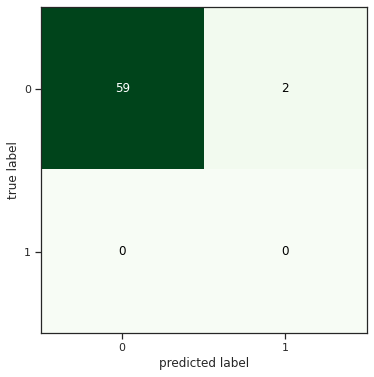

In [136]:
#plotting MLP Confusion Matrix Alive
sns.set_theme(style = ('white'))
plt.rcParams['figure.figsize'] = (6, 6)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_alive, cmap = 'Greens')

The dataset used is this exercise can downloaded in https://drive.google.com/drive/folders/1twf6tSeqLqHWviy0vY-R4vwx-
NMBZBa3?usp=sharing